In [230]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [231]:
df=pd.read_csv('winequality-red.csv')

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [233]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [234]:
missing_cols = df.columns[df.isnull().sum() > 0]

for col in missing_cols:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True) 
    else: 
        df[col].fillna(df[col].mean(), inplace=True) 

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [236]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [237]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()


In [238]:
categorical_col=df.select_dtypes(include=['object','category']).columns

In [239]:
cardinality=df[categorical_col].nunique()

In [240]:
cardinality

Series([], dtype: float64)

In [241]:
df=df.astype(int)

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   fixed acidity         1599 non-null   int64
 1   volatile acidity      1599 non-null   int64
 2   citric acid           1599 non-null   int64
 3   residual sugar        1599 non-null   int64
 4   chlorides             1599 non-null   int64
 5   free sulfur dioxide   1599 non-null   int64
 6   total sulfur dioxide  1599 non-null   int64
 7   density               1599 non-null   int64
 8   pH                    1599 non-null   int64
 9   sulphates             1599 non-null   int64
 10  alcohol               1599 non-null   int64
 11  quality               1599 non-null   int64
dtypes: int64(12)
memory usage: 150.0 KB


In [243]:
    #Baseline score topish va u orqali yangi yaratilinadigan featurelar bizga + yoki - mi aniqlaymiz
X = df.copy()
y = X.pop("quality")

# Train and score baseline model
baseline = DecisionTreeRegressor(criterion="absolute_error", random_state=42)
baseline_score = cross_val_score(
    baseline, X, y, cv=5, scoring="neg_mean_absolute_error"
)
baseline_score = -1 * baseline_score.mean()

print(f"MAE Baseline Score: {baseline_score:.4}")

MAE Baseline Score: 0.6616


In [244]:
df['density']

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: density, Length: 1599, dtype: int64

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   fixed acidity         1599 non-null   int64
 1   volatile acidity      1599 non-null   int64
 2   citric acid           1599 non-null   int64
 3   residual sugar        1599 non-null   int64
 4   chlorides             1599 non-null   int64
 5   free sulfur dioxide   1599 non-null   int64
 6   total sulfur dioxide  1599 non-null   int64
 7   density               1599 non-null   int64
 8   pH                    1599 non-null   int64
 9   sulphates             1599 non-null   int64
 10  alcohol               1599 non-null   int64
 11  quality               1599 non-null   int64
dtypes: int64(12)
memory usage: 150.0 KB


In [246]:
X["fixTovolRatio"] = X["fixed acidity"] / X["volatile acidity"]
X["fixTodensityRatio"] = X["fixed acidity"] / X["density"]
X["phRatio"] = X["alcohol"] / (X["pH"] + X["chlorides"])
X["altosulratio"] = X["sulphates"] / (X["alcohol"] + X["fixed acidity"])

In [247]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   int64  
 1   volatile acidity      1599 non-null   int64  
 2   citric acid           1599 non-null   int64  
 3   residual sugar        1599 non-null   int64  
 4   chlorides             1599 non-null   int64  
 5   free sulfur dioxide   1599 non-null   int64  
 6   total sulfur dioxide  1599 non-null   int64  
 7   density               1599 non-null   int64  
 8   pH                    1599 non-null   int64  
 9   sulphates             1599 non-null   int64  
 10  alcohol               1599 non-null   int64  
 11  fixTovolRatio         1599 non-null   float64
 12  fixTodensityRatio     1599 non-null   float64
 13  phRatio               1599 non-null   float64
 14  altosulratio          1599 non-null   float64
dtypes: float64(4), int64(

In [250]:
print(X.isnull().sum())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
fixTovolRatio           0
fixTodensityRatio       0
phRatio                 0
altosulratio            0
dtype: int64


In [252]:
df=df.astype(int)

In [286]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fixed acidity            1599 non-null   float64
 1   volatile acidity         1599 non-null   float64
 2   citric acid              1599 non-null   float64
 3   residual sugar           1599 non-null   float64
 4   chlorides                1599 non-null   float64
 5   free sulfur dioxide      1599 non-null   float64
 6   total sulfur dioxide     1599 non-null   float64
 7   density                  1599 non-null   float64
 8   pH                       1599 non-null   float64
 9   sulphates                1599 non-null   float64
 10  quality                  1599 non-null   int64  
 11  pHTodensityRatio         1599 non-null   float64
 12  acidTosulphatesRatio     1599 non-null   float64
 13  qualityTosulphatesRatio  1599 non-null   float64
dtypes: float64(13), int64(1)

In [287]:
cardinality

Series([], dtype: float64)

In [288]:
df=df.astype(int)

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   fixed acidity         1599 non-null   int64
 1   volatile acidity      1599 non-null   int64
 2   citric acid           1599 non-null   int64
 3   residual sugar        1599 non-null   int64
 4   chlorides             1599 non-null   int64
 5   free sulfur dioxide   1599 non-null   int64
 6   total sulfur dioxide  1599 non-null   int64
 7   density               1599 non-null   int64
 8   pH                    1599 non-null   int64
 9   sulphates             1599 non-null   int64
 10  quality               1599 non-null   int64
 11  alcohol               1599 non-null   int64
dtypes: int64(12)
memory usage: 150.0 KB


In [290]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

model = DecisionTreeRegressor(random_state=42)
score = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
score = -1 * score.mean()

print(f"MAE Score with Synthetic Features: {score:.4f}")


MAE Score with Synthetic Features: 0.6278


In [225]:
#MAE Baseline Score: 0.6616
#MAE Score with Synthetic Features: 0.6278

# Mutual Information

In [257]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv('winequality-red.csv')

In [258]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [261]:
df[['alcohol', 'quality']] = df[['quality', 'alcohol']]

In [263]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,9.4


In [264]:
df.columns = df.columns.str.replace('quality', 'Temp').str.replace('alcohol', 'quality').str.replace('Temp', 'alcohol')

In [265]:
df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,alcohol
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,9.4


In [266]:
missing_cols = df.columns[df.isnull().sum() > 0]

for col in missing_cols:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True) 
    else: 
        df[col].fillna(df[col].mean(), inplace=True) 

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  quality               1599 non-null   int64  
 11  alcohol               1599 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [268]:
df['alcohol'].value_counts()

alcohol
9.500000     139
9.400000     103
9.800000      78
9.200000      72
10.000000     67
            ... 
9.950000       1
9.233333       1
9.250000       1
9.050000       1
10.750000      1
Name: count, Length: 65, dtype: int64

In [269]:

unique_values = df['alcohol'].unique()


print(unique_values)

[ 9.4         9.8        10.          9.5        10.5         9.2
  9.9         9.1         9.3         9.          9.7        10.1
 10.6         9.6        10.8        10.3        13.1        10.2
 10.9        10.7        12.9        10.4        13.         14.
 11.5        11.4        12.4        11.         12.2        12.8
 12.6        12.5        11.7        11.3        12.3        12.
 11.9        11.8         8.7        13.3        11.2        11.6
 11.1        13.4        12.1         8.4        12.7        14.9
 13.2        13.6        13.5        10.03333333  9.55        8.5
 11.06666667  9.56666667 10.55        8.8        13.56666667 11.95
  9.95        9.23333333  9.25        9.05       10.75      ]


In [270]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming df is your DataFrame
label_encoder = LabelEncoder()

# Apply label encoding to all object (categorical) columns
for colname in df.select_dtypes("object"):
    df[colname] = label_encoder.fit_transform(df[colname])

# Check the changes
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   quality  alcohol  
0        5      9.4  
1        5      9.8  
2        5      9.8 

In [271]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

# Assuming your data is in a dataframe `df` and target variable is 'price'
X = df.drop('alcohol', axis=1)  # Features
y = df['alcohol']  # Target

In [272]:
mi_scores = mutual_info_regression(X, y)

In [273]:
# Convert to DataFrame for better readability
mi_scores_df = pd.DataFrame(mi_scores, index=X.columns, columns=['MI Score'])
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

# Print MI scores
print(mi_scores_df)

                      MI Score
density               0.442176
total sulfur dioxide  0.249823
chlorides             0.246859
fixed acidity         0.229091
volatile acidity      0.220017
pH                    0.198425
sulphates             0.184367
citric acid           0.165576
quality               0.151739
residual sugar        0.115861
free sulfur dioxide   0.115687


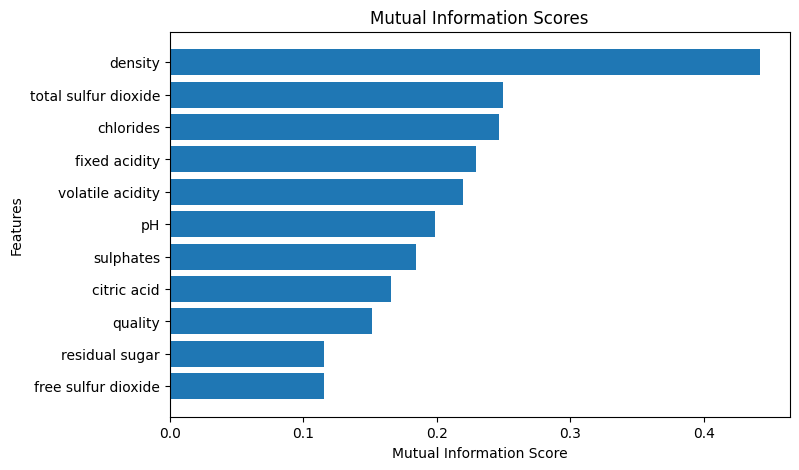

In [274]:
# Define the function to plot Mutual Information scores
import numpy as np
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)  # Sort values for horizontal bar chart
    width = np.arange(len(scores))  # Generate positions for bars
    ticks = list(scores.index)  # List of feature names for ticks
    
    # Plotting
    plt.barh(width, scores)
    plt.yticks(width, ticks)  # Set the y-axis ticks to the feature names
    plt.title("Mutual Information Scores")
    plt.xlabel("Mutual Information Score")
    plt.ylabel("Features")
    plt.show()

# Plot the MI scores
plt.figure(dpi=100, figsize=(8, 5))  # Set figure size and resolution
plot_mi_scores(mi_scores_df['MI Score'])  # Pass only MI Score column to plot function

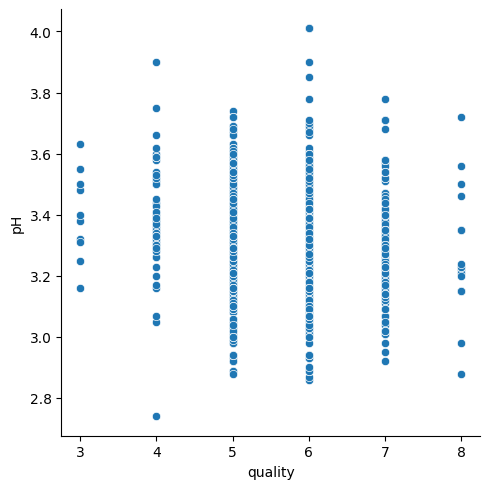

In [276]:
sns.relplot(x="quality", y="pH", data=df);

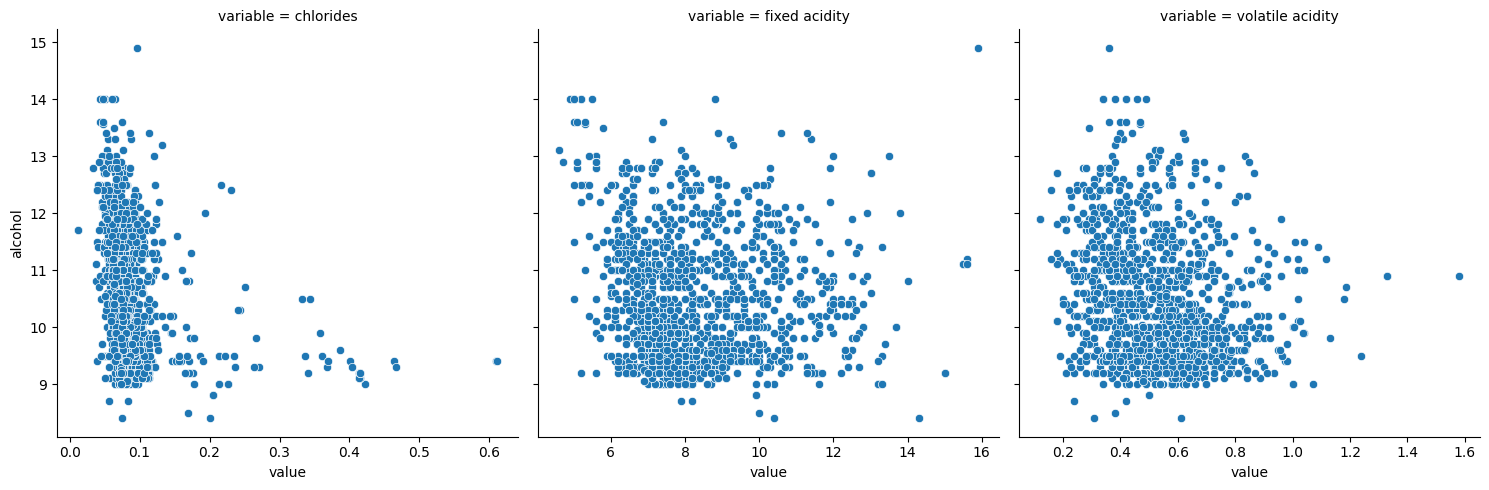

In [277]:
features = ["chlorides", "fixed acidity", "volatile acidity"]
sns.relplot(
    x="value", y="alcohol", col="variable", data=df.melt(id_vars="alcohol", value_vars=features), facet_kws=dict(sharex=False),
);



In [278]:
X = df.copy()
y = X.pop("alcohol")

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  quality               1599 non-null   int64  
 11  alcohol               1599 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [281]:
# Add new synthetic features to the dataset
X["pHTodensityRatio"] = X["pH"] / X["density"]
X["acidTosulphatesRatio"] = X["citric acid"] / X["sulphates"]
X["qualityTosulphatesRatio"] = X["quality"] / X["sulphates"]

In [282]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fixed acidity            1599 non-null   float64
 1   volatile acidity         1599 non-null   float64
 2   citric acid              1599 non-null   float64
 3   residual sugar           1599 non-null   float64
 4   chlorides                1599 non-null   float64
 5   free sulfur dioxide      1599 non-null   float64
 6   total sulfur dioxide     1599 non-null   float64
 7   density                  1599 non-null   float64
 8   pH                       1599 non-null   float64
 9   sulphates                1599 non-null   float64
 10  quality                  1599 non-null   int64  
 11  pHTodensityRatio         1599 non-null   float64
 12  acidTosulphatesRatio     1599 non-null   float64
 13  qualityTosulphatesRatio  1599 non-null   float64
dtypes: float64(13), int64(1)

In [283]:
mi_scores = mutual_info_regression(X, y)

In [284]:
mi_scores

array([0.22719874, 0.22832758, 0.1997094 , 0.09448071, 0.24348249,
       0.11740616, 0.25652801, 0.44390733, 0.18701594, 0.19835726,
       0.17745333, 0.26426258, 0.24577347, 0.21830689])

In [285]:
# Convert to DataFrame for better readability
mi_scores_df = pd.DataFrame(mi_scores, index=X.columns, columns=['MI Score'])
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

# Print MI scores
print(mi_scores_df)

                         MI Score
density                  0.443907
pHTodensityRatio         0.264263
total sulfur dioxide     0.256528
acidTosulphatesRatio     0.245773
chlorides                0.243482
volatile acidity         0.228328
fixed acidity            0.227199
qualityTosulphatesRatio  0.218307
citric acid              0.199709
sulphates                0.198357
pH                       0.187016
quality                  0.177453
free sulfur dioxide      0.117406
residual sugar           0.094481


In [ ]:
#before
                      MI Score
density               0.442176
total sulfur dioxide  0.249823
chlorides             0.246859
fixed acidity         0.229091
volatile acidity      0.220017
pH                    0.198425
sulphates             0.184367
citric acid           0.165576
quality               0.151739
residual sugar        0.115861
free sulfur dioxide   0.115687